# Data Analysis

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.listdir("dataset/msvd_videos")

['images', 'msvd_videos', 'video_corpus.csv']

In [3]:
videos_list = os.listdir("dataset/msvd_videos/msvd_videos")

In [4]:
num_videos = len(videos_list)
for i in range(num_videos):
    videos_list[i] = videos_list[i][:-4]

In [5]:
#Captions
df = pd.read_csv("dataset/msvd_videos/video_corpus.csv")
df.head()

,VideoID,Start,End,WorkerID,Source,AnnotationTime,Language,Description
0,mv89psg6zh4,33,46,588702,unverified,55,Slovene,Papagaj se umiva pod tekočo vodo v lijaku.
1,mv89psg6zh4,33,46,588702,unverified,37,Slovene,Papagaj se umiva pod tekočo vodo v lijaku.
2,mv89psg6zh4,33,46,362812,unverified,11,Macedonian,папагал се бања
3,mv89psg6zh4,33,46,968828,unverified,84,German,Ein Wellensittich duscht unter einem Wasserhahn.
4,mv89psg6zh4,33,46,203142,unverified,14,Romanian,o pasare sta intr-o chiuveta.


In [6]:
df = df[df['Language'] == 'English']

In [7]:
df['Name'] = df[['VideoID', 'Start', 'End']].apply(lambda x: x['VideoID'] + '_' + str(x['Start']) + '_' + str(x['End']), axis = 1)

In [8]:
df.head()

,VideoID,Start,End,WorkerID,Source,AnnotationTime,Language,Description,Name
18,mv89psg6zh4,33,46,682611,clean,66,English,A bird in a sink keeps getting under the runni...,mv89psg6zh4_33_46
19,mv89psg6zh4,33,46,760882,clean,16,English,A bird is bathing in a sink.,mv89psg6zh4_33_46
20,mv89psg6zh4,33,46,878566,clean,76,English,A bird is splashing around under a running fau...,mv89psg6zh4_33_46
21,mv89psg6zh4,33,46,707318,clean,14,English,A bird is bathing in a sink.,mv89psg6zh4_33_46
22,mv89psg6zh4,33,46,135621,clean,58,English,A bird is standing in a sink drinking water th...,mv89psg6zh4_33_46


In [9]:
captioned_videos = set(df['Name'])

In [10]:
videos = set(videos_list)

In [11]:
videos_final = list(videos.intersection(captioned_videos)) #These have both video and caption

In [12]:
data = df[['Name', 'Description']]

# Preprocessing

In [13]:
import cv2
import matplotlib.pyplot as plt
import math

In [14]:
#Loading the video (say 'mv89psg6zh4_33_46')
count = 0

video_name = 'mv89psg6zh4_33_46.avi'

video_captured = cv2.VideoCapture('dataset/msvd_videos/msvd_videos/'+video_name)

while(video_captured.isOpened()):
    frameId = video_captured.get(1)
    ret, frame = video_captured.read()
    
    if ret != True:
        break
        
    if frameId % 10 == 0:
        filename = "frame" + str(count) + ".jpg"
        count += 1
        cv2.imwrite('dataset/msvd_videos/images/' + filename, frame)
        
video_captured.release()
print("Done")

Done


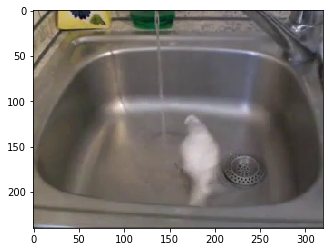

In [15]:
img = plt.imread('dataset/msvd_videos/images/frame0.jpg')
plt.imshow(img)